In [107]:
#Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
#Load the data
obesity = pd.read_csv('ObesityDataSet.csv')

#View the data
obesity[:5]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [109]:
#Provide information about the dataset
obesity.info()

#Provide the descriptive statistics
obesity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [110]:
# Define the age bins and labels
age_bins = [13, 19, 25, 31, 37, 43, 49, 55, 65]  # Adjust the bin edges as needed
age_labels = ['14-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-61']

# Bin the 'Age' column and replace the original values
obesity['Age'] = pd.cut(obesity['Age'], bins=age_bins, labels=age_labels)

print(obesity)


      Gender    Age    Height      Weight family_history_with_overweight FAVC  \
0     Female  19-24  1.620000   64.000000                            yes   no   
1     Female  19-24  1.520000   56.000000                            yes   no   
2       Male  19-24  1.800000   77.000000                            yes   no   
3       Male  25-30  1.800000   87.000000                             no   no   
4       Male  19-24  1.780000   89.800000                             no   no   
...      ...    ...       ...         ...                            ...  ...   
2106  Female  19-24  1.710730  131.408528                            yes  yes   
2107  Female  19-24  1.748584  133.742943                            yes  yes   
2108  Female  19-24  1.752206  133.689352                            yes  yes   
2109  Female  19-24  1.739450  133.346641                            yes  yes   
2110  Female  19-24  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC 

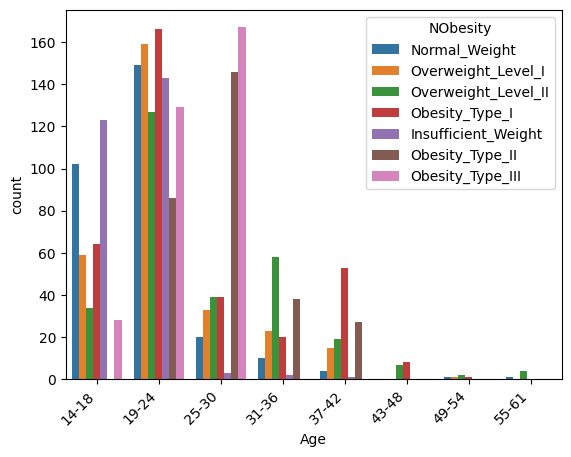

In [111]:
#Visualize the count of the Age column with the class column
sns.countplot(data=obesity,x='Age',hue='NObesity')
plt.xticks(rotation=45, ha='right');

In [112]:
#Find the sum of duplicate values in the dataset
#Most of the attributes are categorical variables which result in duplicate values so these shouldn't be removed
obesity.duplicated().sum()

24

In [113]:
#Find the null values
#There are no null values

obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64

Text(0.5, 1.0, 'Obesity Data Set')

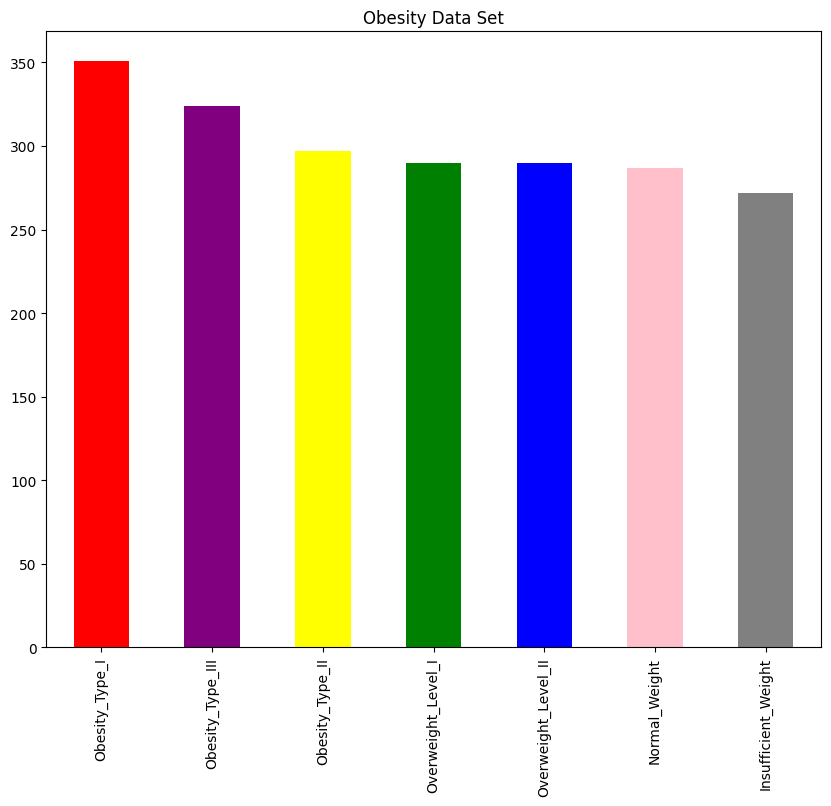

In [114]:
#Bar graph that display the number of observations in each category of the class variable

color = ['red', 'purple', 'yellow', 'green', 'blue', 'pink', 'grey']
ObesityBar = obesity['NObesity'].value_counts()
ObesityBar.plot(kind='bar',figsize=(10,8), color = color)
plt.title('Obesity Data Set')

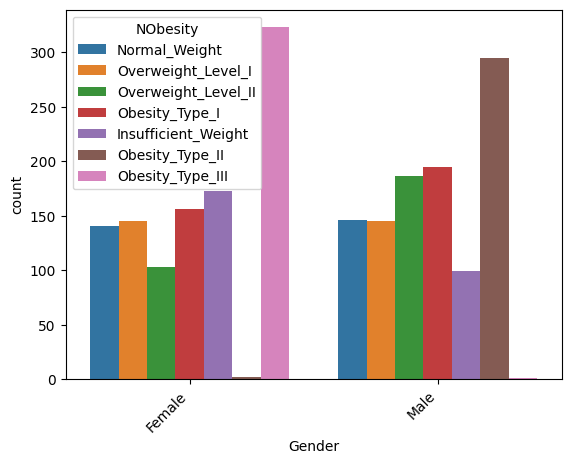

In [115]:
#Visualize the count of the Gender column with the class column
sns.countplot(data=obesity,x='Gender',hue='NObesity')
plt.xticks(rotation=45, ha='right');

In [116]:
#Percentage of each variable in the class column
obesity['NObesity'].value_counts(normalize=True)*100

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObesity, dtype: float64

In [117]:
#Count of each NObesity category in each Gender
obesity.groupby(['Gender', 'NObesity'])['NObesity'].agg('count')

Gender  NObesity           
Female  Insufficient_Weight    173
        Normal_Weight          141
        Obesity_Type_I         156
        Obesity_Type_II          2
        Obesity_Type_III       323
        Overweight_Level_I     145
        Overweight_Level_II    103
Male    Insufficient_Weight     99
        Normal_Weight          146
        Obesity_Type_I         195
        Obesity_Type_II        295
        Obesity_Type_III         1
        Overweight_Level_I     145
        Overweight_Level_II    187
Name: NObesity, dtype: int64

In [118]:
#Combine the different levels of overweight and obese
obese = obesity['NObesity'].map({'Normal_Weight': 'Normal', 'Insufficient_Weight': 'Underweight', 'Overweight_Level_I':'Overweight', 'Overweight_Level_II':'Overweight', 'Obesity_Type_I':'Obese', 'Obesity_Type_II':'Obese', 'Obesity_Type_III':'Obese'})

In [119]:
#Percentage of the obese, overweight, normal, and underweight
#Easier to visualize compared to having individual levels of overweight and obese
obese.value_counts(normalize=True)*100

Obese          46.044529
Overweight     27.475130
Normal         13.595452
Underweight    12.884889
Name: NObesity, dtype: float64

In [120]:
#Correlation values

obesity.corr()

<ipython-input-120-29b43e5de7b1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  obesity.corr()


,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Height,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<ipython-input-121-5711d1c38d35>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity.corr(), annot=True)


<Axes: >

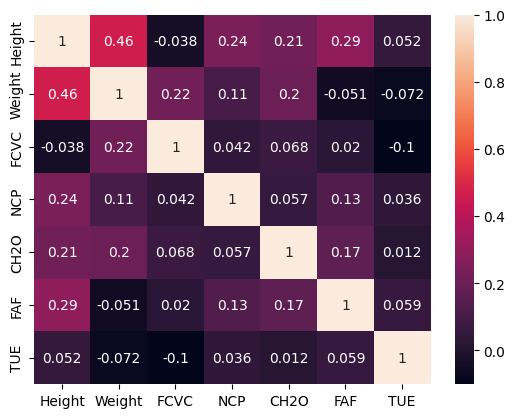

In [121]:
#Correlation plot with the values

sns.heatmap(obesity.corr(), annot=True)